In [1]:
import pandas as pd #library for operations of dataaframe
import numpy as np  #librar for computution
import matplotlib.pyplot as plt #library for plotting graphs
import seaborn as sns   #library for plotting graphs
sns.set()
import warnings   #library for avoid warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/kaggle/input/heart/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


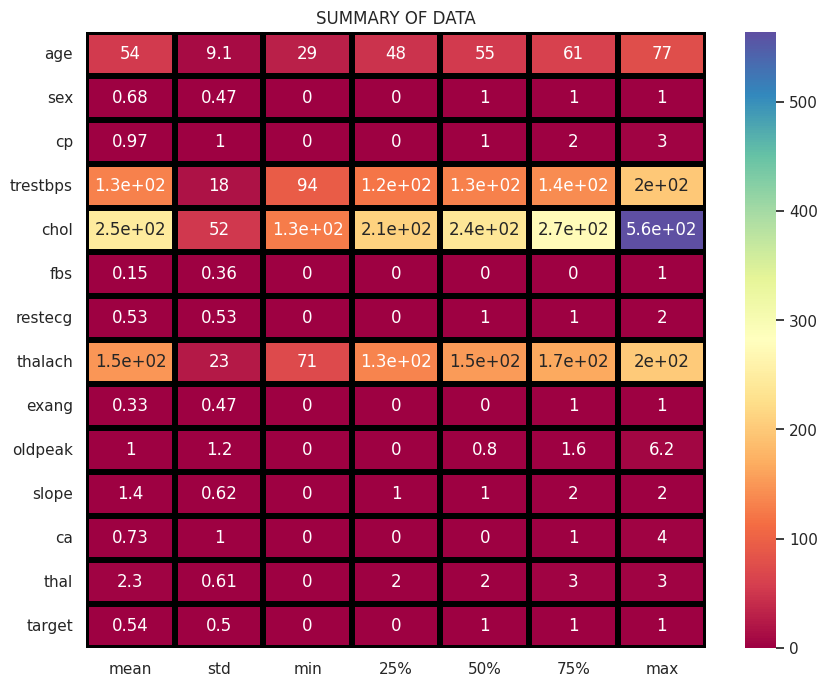

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.describe()[1:].transpose(),
            annot=True,linecolor="black",
            linewidth=3,cmap=sns.color_palette("Spectral", as_cmap=True))
plt.title("SUMMARY OF DATA")
plt.show()

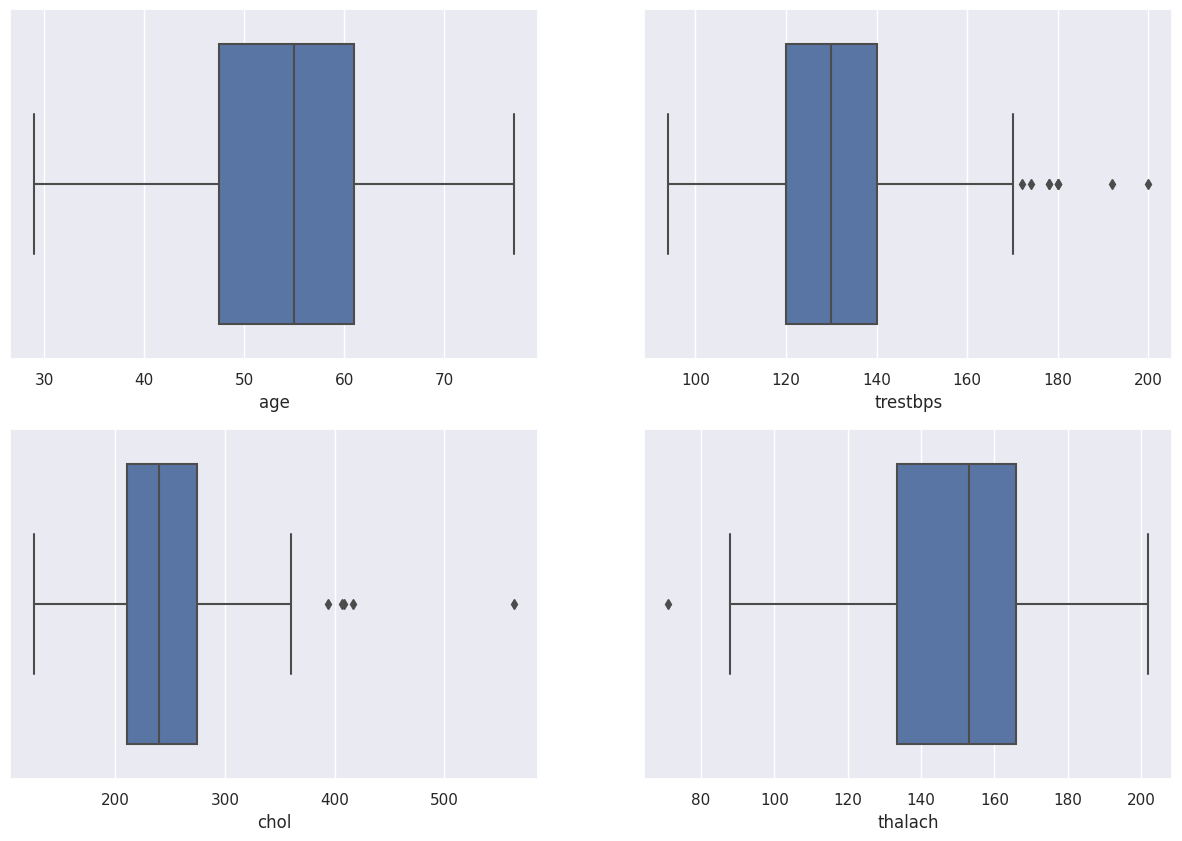

In [8]:
fig, axarr = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(x='age', data = df, ax=axarr[0][0])
sns.boxplot(x='trestbps',data = df, ax=axarr[0][1]) 
sns.boxplot(x='chol', data = df, ax=axarr[1][0])
sns.boxplot(x='thalach',data = df, ax=axarr[1][1])
plt.show()

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

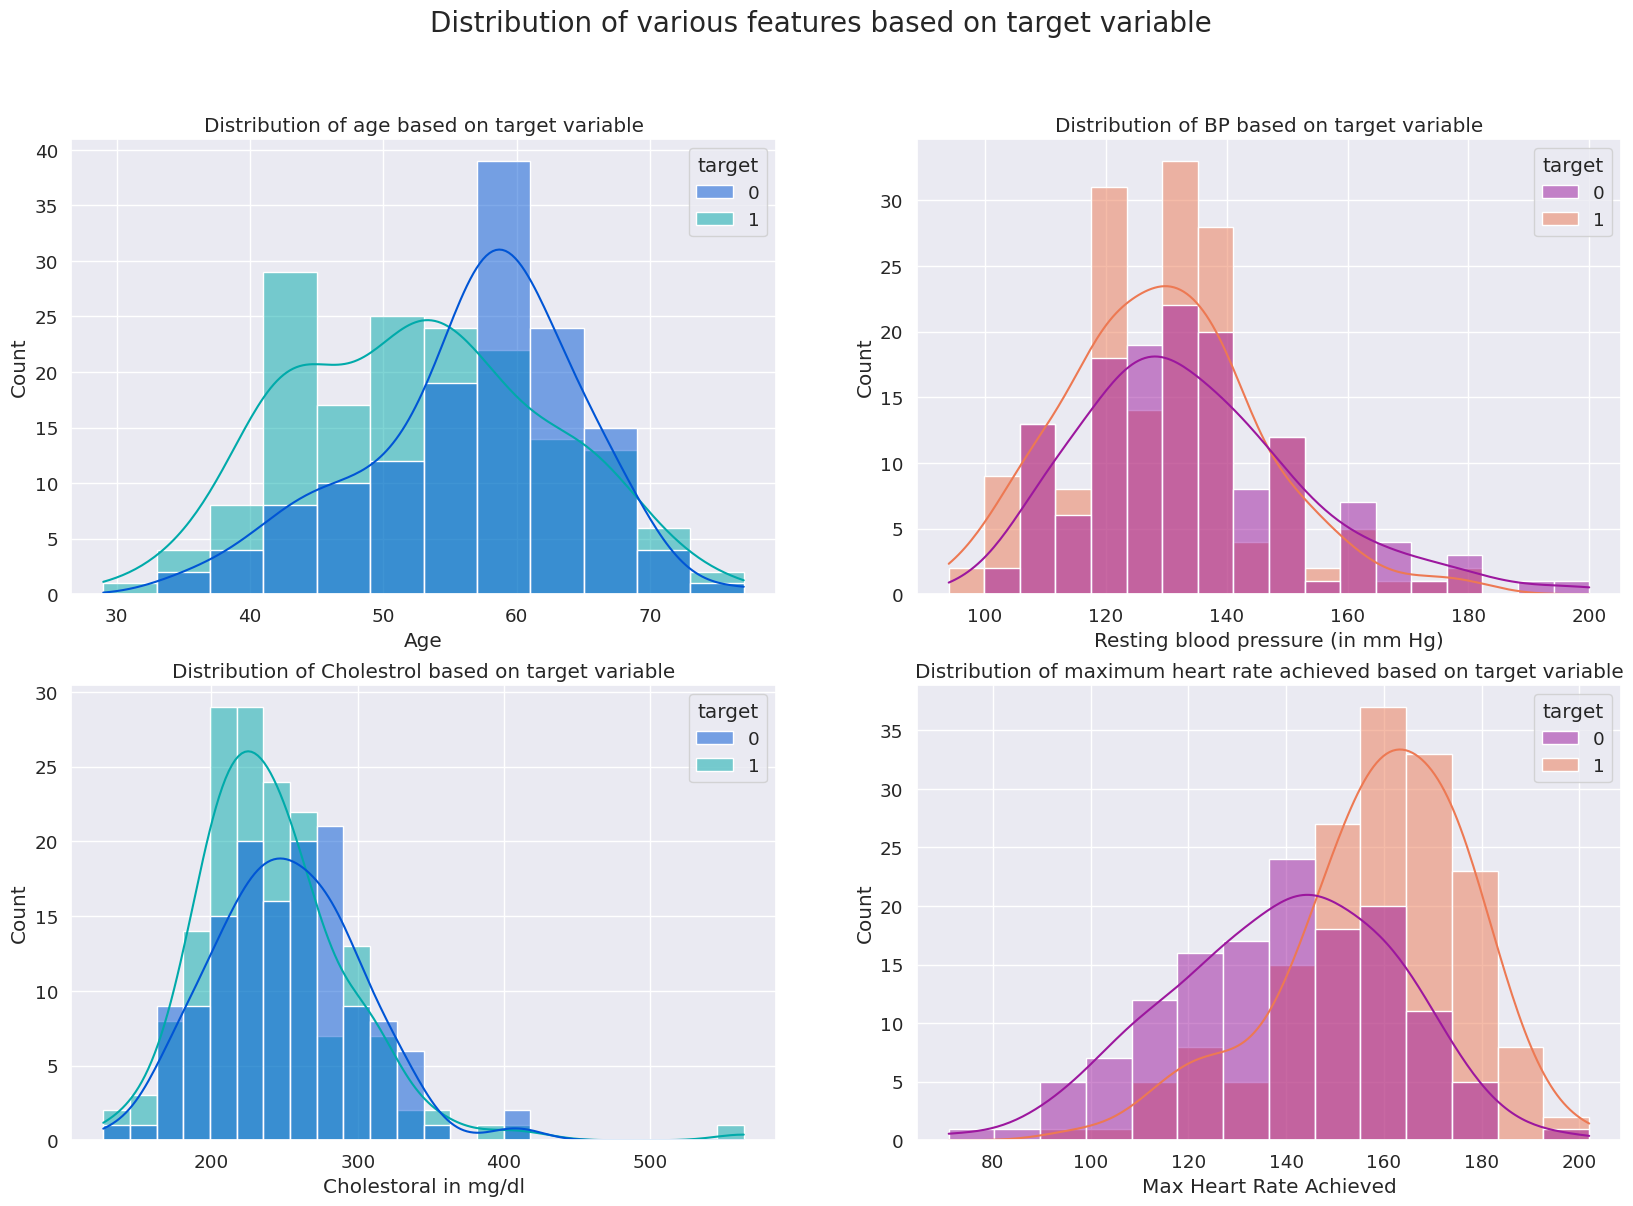

In [10]:
sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(2, 2, figsize = (20, 13))

plt.suptitle('Distribution of various features based on target variable', fontsize = 20)

ax1 = sns.histplot(x ='age', data= df, hue= 'target', kde= True, ax= ax[0, 0], palette='winter')
ax1.set(xlabel = 'Age', title= 'Distribution of age based on target variable')

ax2 = sns.histplot(x ='trestbps', data= df, hue= 'target', kde= True, ax= ax[0, 1], palette='plasma')
ax2.set(xlabel = 'Resting blood pressure (in mm Hg)', title= 'Distribution of BP based on target variable')

ax3 = sns.histplot(x ='chol', data= df, hue= 'target', kde= True, ax= ax[1, 0], palette='winter')
ax3.set(xlabel = 'Cholestoral in mg/dl', title= 'Distribution of Cholestrol based on target variable')

ax4 = sns.histplot(x ='thalach', data= df, hue= 'target', kde= True, ax= ax[1, 1], palette='plasma')
ax4.set(xlabel = 'Max Heart Rate Achieved', title= 'Distribution of maximum heart rate achieved based on target variable')

plt.show()

<Axes: xlabel='thal', ylabel='count'>

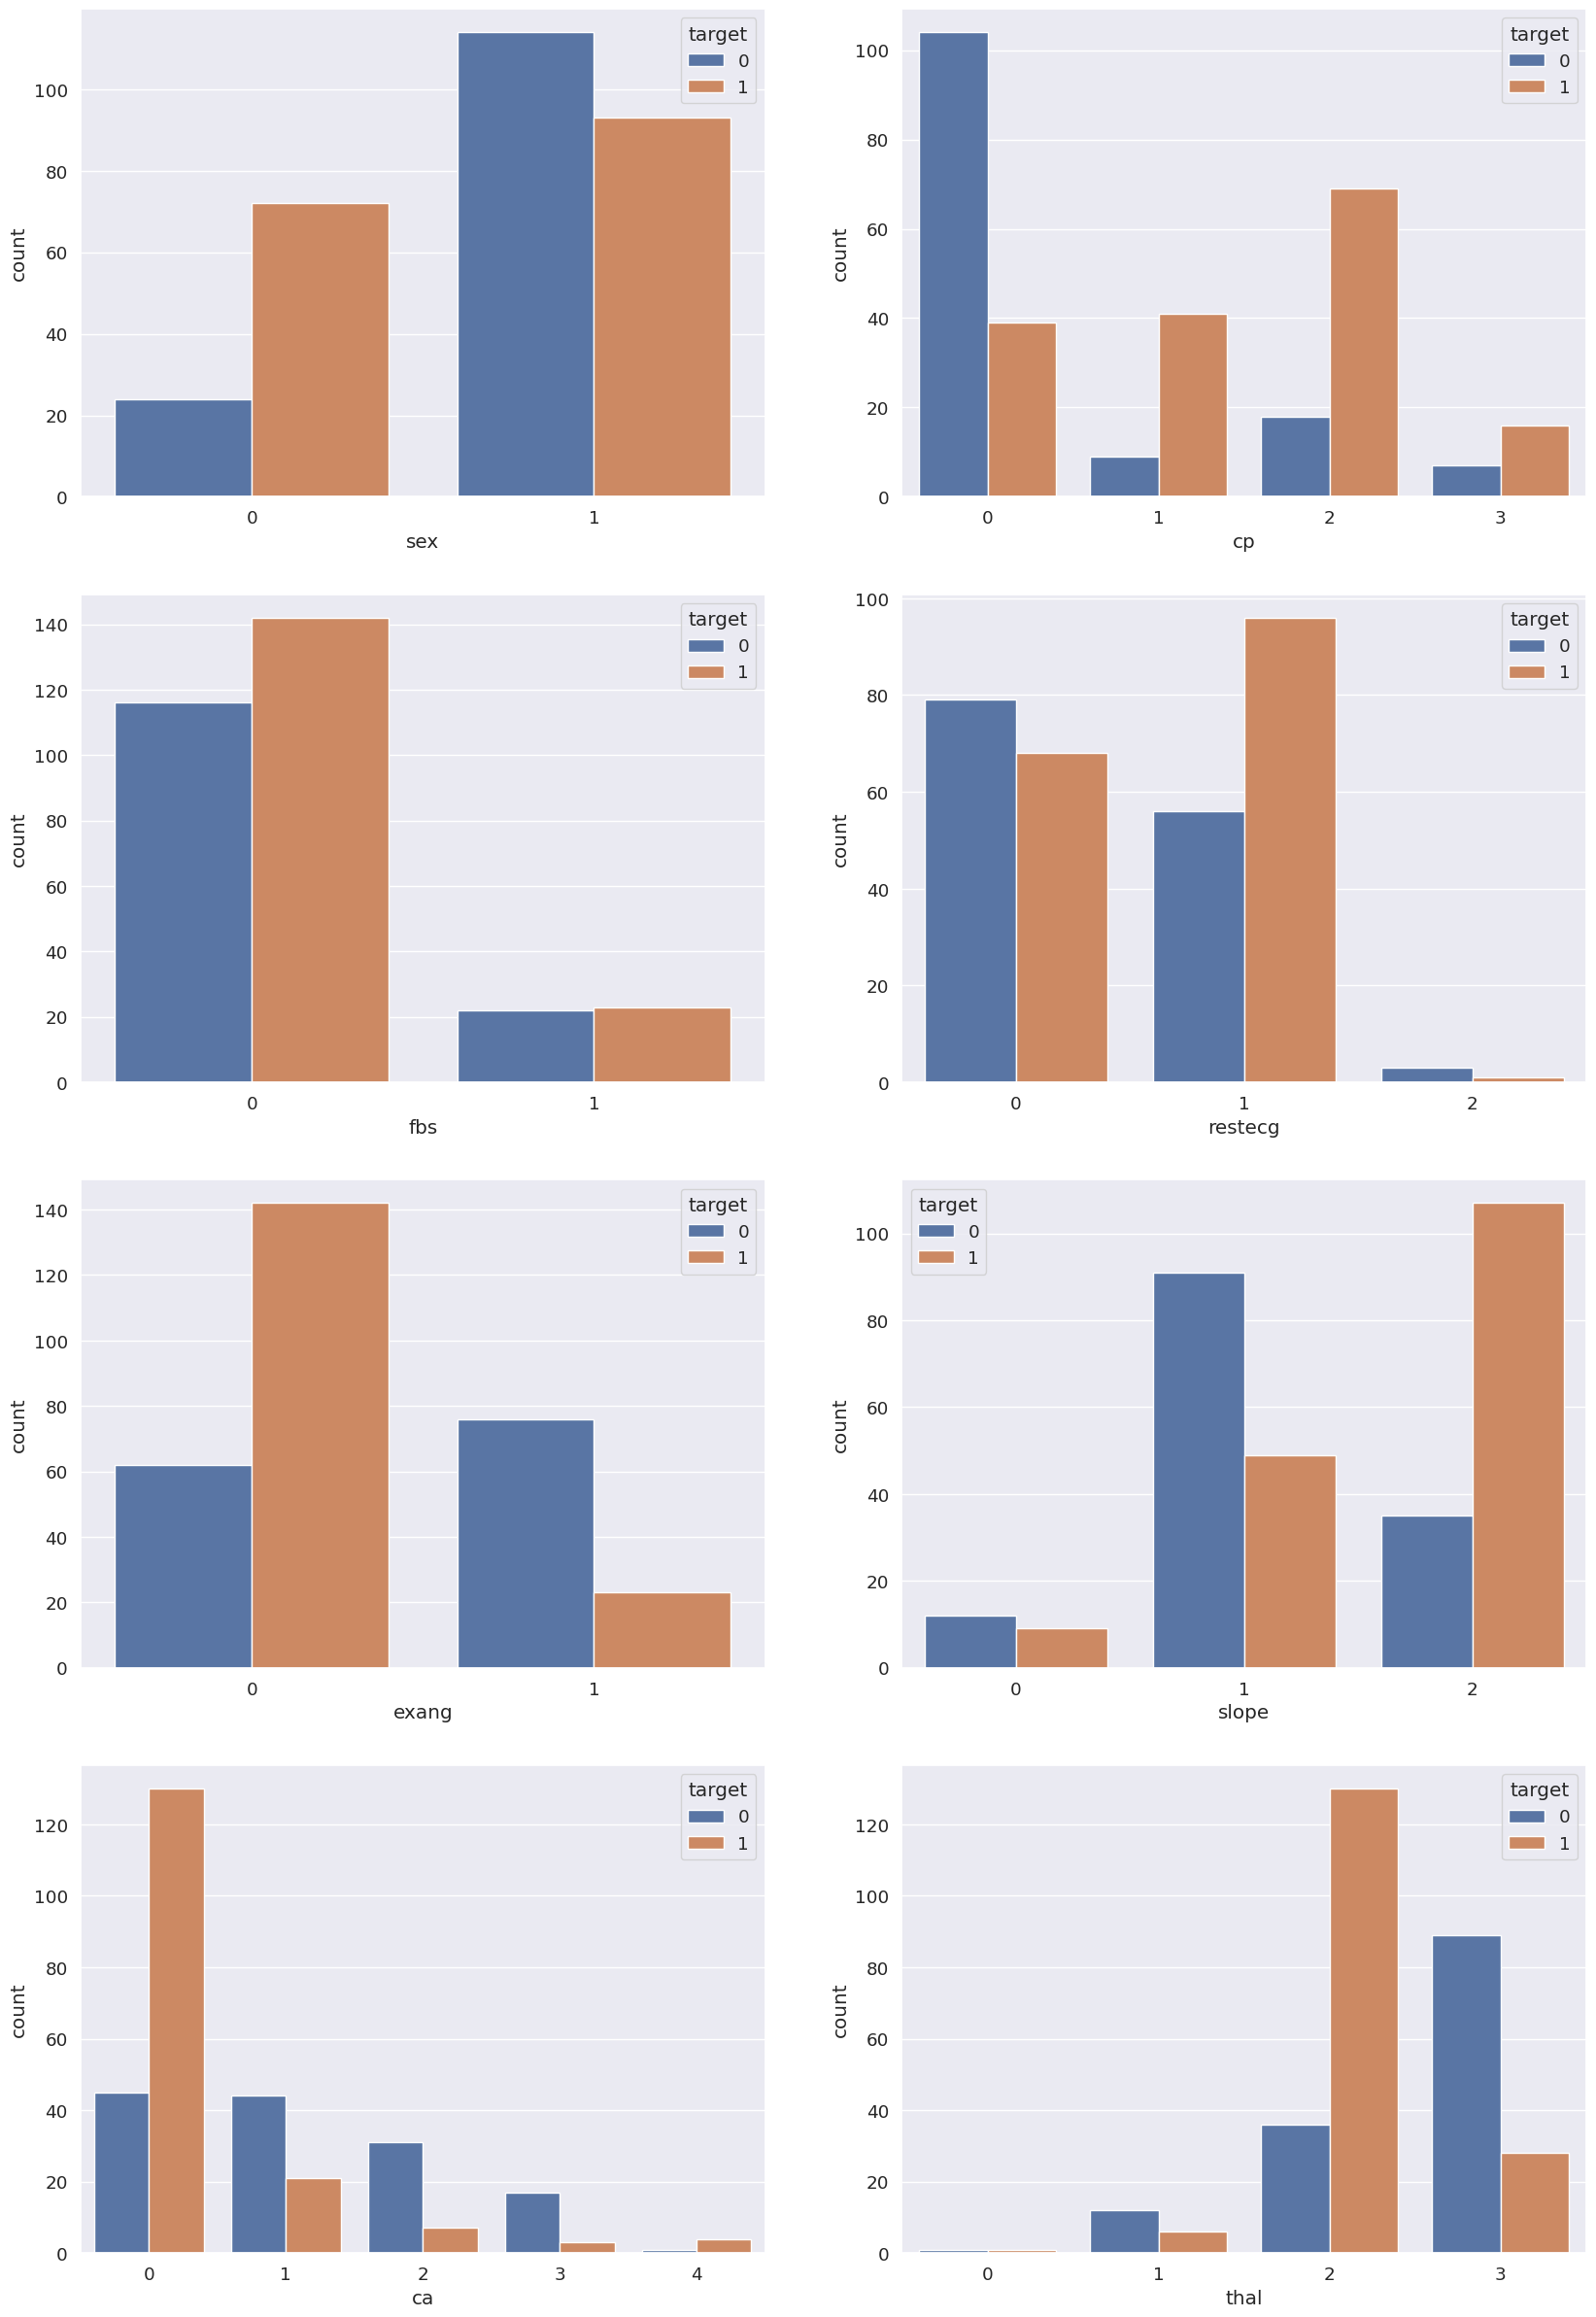

In [11]:
fig, axarr = plt.subplots(4, 2, figsize=(20, 30))
sns.countplot(x='sex', hue = 'target',data = df, ax=axarr[0][0])
sns.countplot(x='cp', hue = 'target',data = df, ax=axarr[0][1]) 
sns.countplot(x='fbs', hue = 'target',data = df, ax=axarr[1][0])
sns.countplot(x='restecg', hue = 'target',data = df, ax=axarr[1][1])
sns.countplot(x='exang', hue = 'target',data = df, ax=axarr[2][0])
sns.countplot(x='slope', hue = 'target',data = df, ax=axarr[2][1]) 
sns.countplot(x='ca', hue = 'target',data = df, ax=axarr[3][0])
sns.countplot(x='thal', hue = 'target',data = df, ax=axarr[3][1])

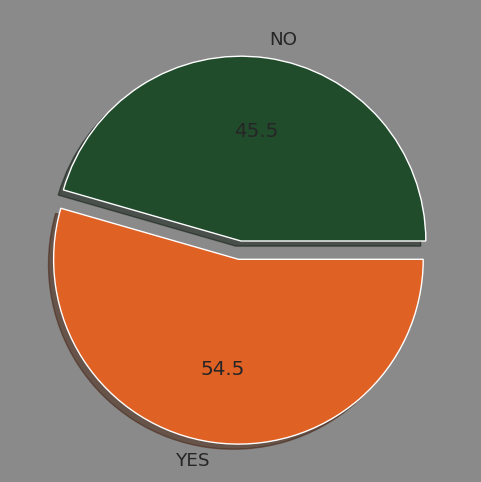

In [12]:
a=df.groupby('target')['target'].count()
a
plt.figure(figsize=(6,6),facecolor='#8a8a8a')
plt.pie(data=df,x=a,labels=['NO','YES'],autopct='%.01f',explode=[0,0.1],shadow=True,center=(0, 0),colors=['#204c2c','#df6124'])
plt.grid()
plt.show()

<Axes: >

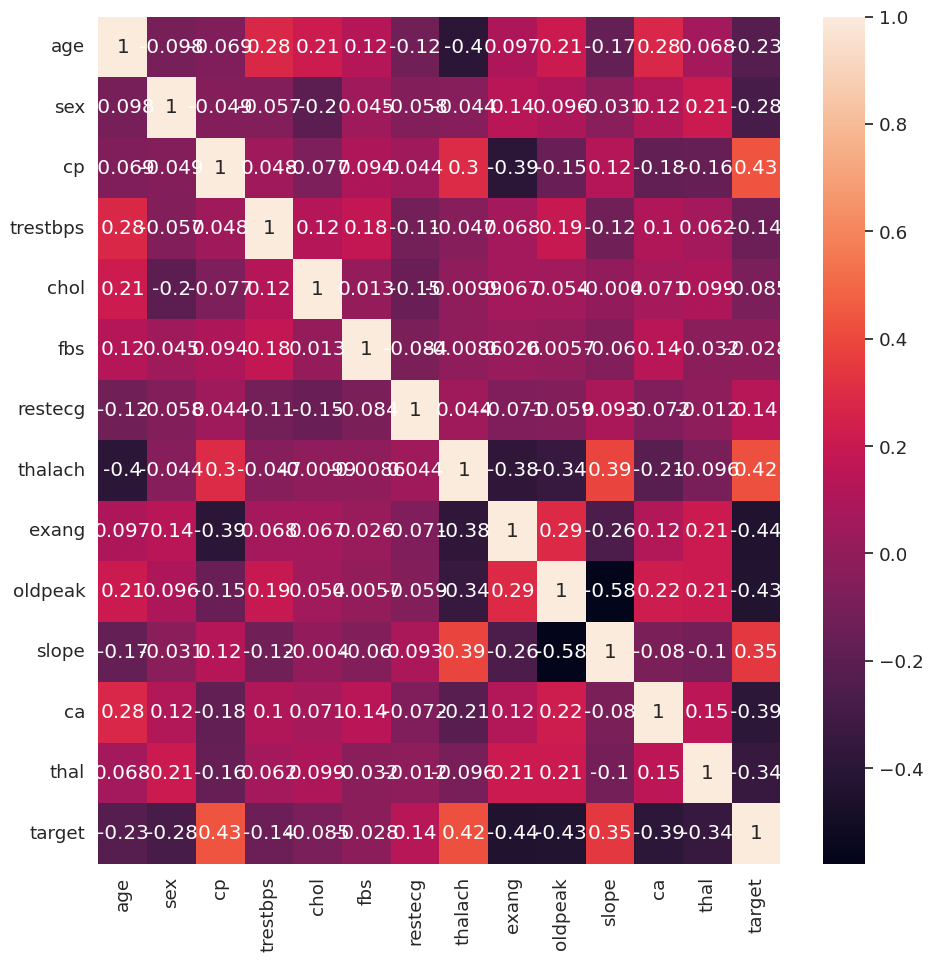

In [13]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(),annot=True,fmt='.2g')

In [14]:
cols= ["#0be05d","#574577"]

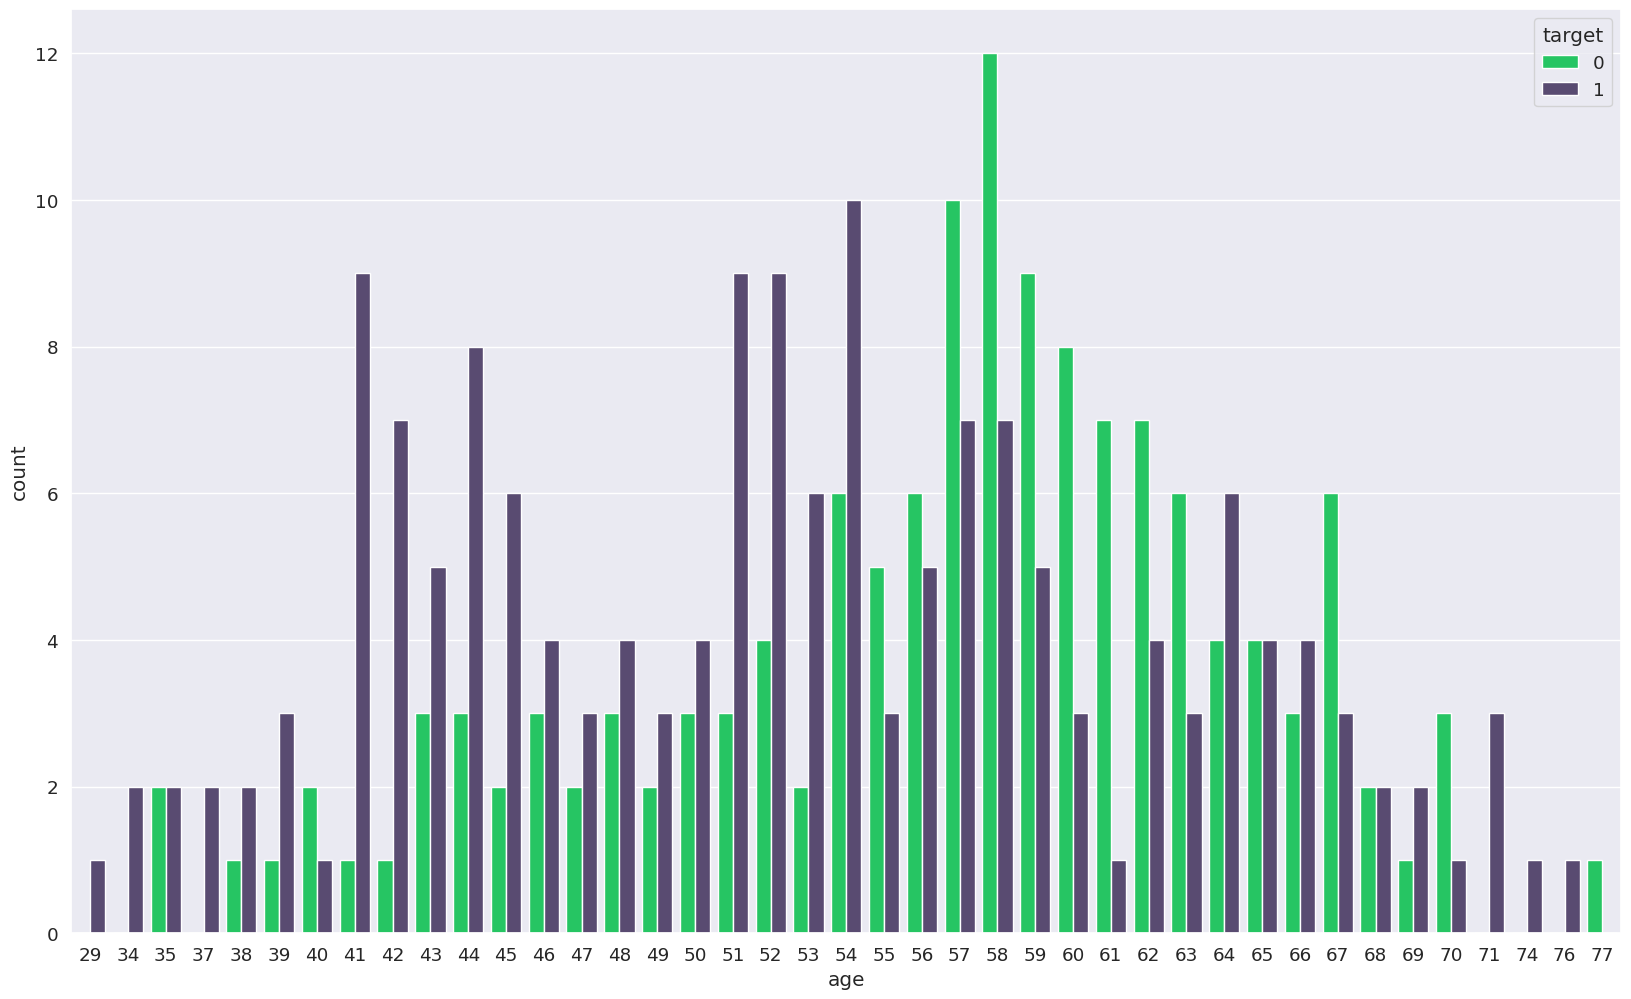

In [15]:
plt.figure(figsize=(20,12))
sns.countplot(x=df['age'],data=df, hue ="target",palette= cols)
plt.show()

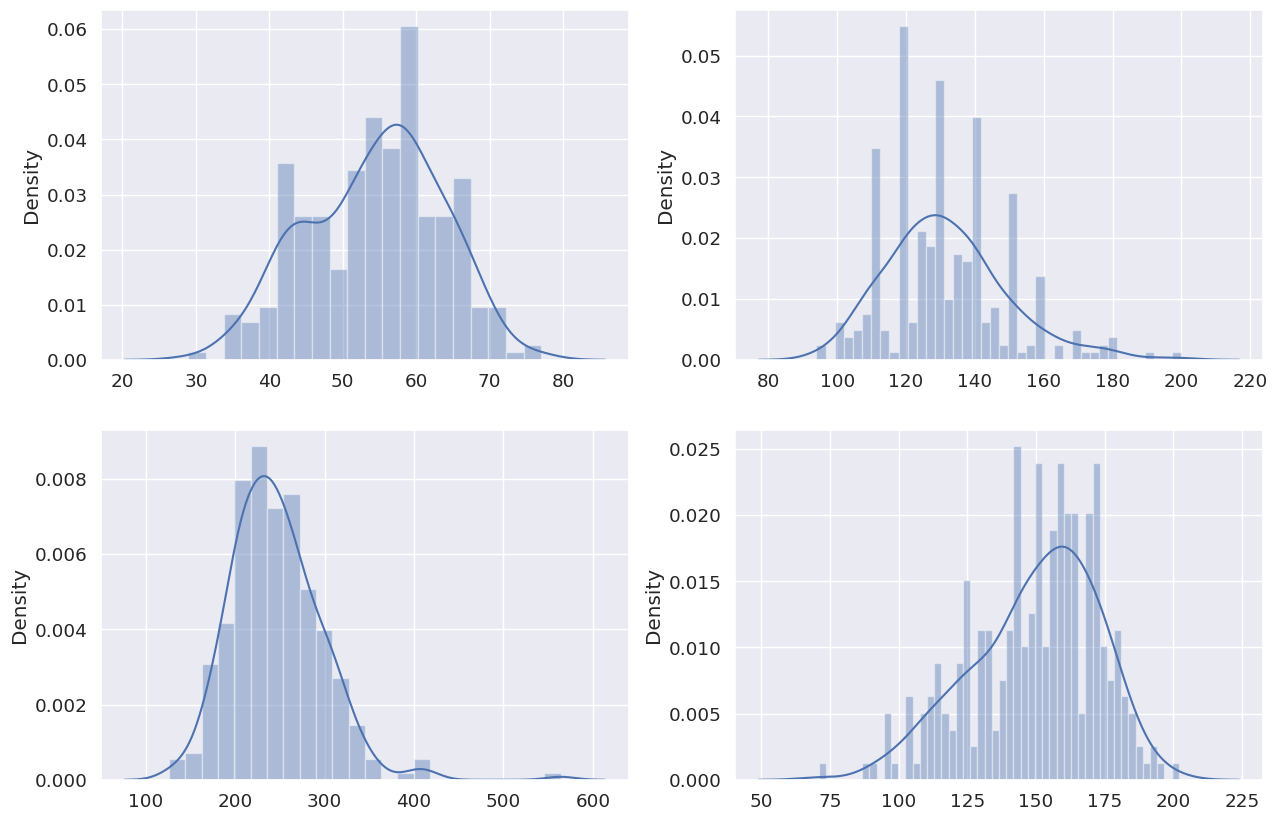

In [16]:
fig, axarr = plt.subplots(2, 2, figsize=(15, 10))
sns.distplot(x=df['age'],bins=20,label=['AGE'],ax=axarr[0][0],kde=True)
sns.distplot(x=df['trestbps'],bins=40,label=['trestbps'],ax=axarr[0][1],kde=True) 
sns.distplot(x=df['chol'],label=['chol'],ax=axarr[1][0],kde=True)
sns.distplot(x=df['thalach'],bins=50,label=['thalach'],ax=axarr[1][1],kde=True)
plt.show()

In [17]:
print('skewness of thalach:',df.thalach.skew())
print('skewness of chol:',df.chol.skew())
print('skewness of trestbps :',df.trestbps.skew())
print('skewness of ages:',df.age.skew())

skewness of thalach: -0.5374096526832253
skewness of chol: 1.1434008206693387
skewness of trestbps : 0.7137684379181465
skewness of ages: -0.2024633654856539


In [18]:
print('kurtosis of thalach:',df.thalach.kurtosis())
print('kurtosis of chol:',df.chol.kurtosis())
print('kurtosis of trestbps :',df.trestbps.kurtosis())
print('kurtosis of ages:',df.age.kurtosis())

kurtosis of thalach: -0.06196993057611566
kurtosis of chol: 4.505423167753712
kurtosis of trestbps : 0.9290540528369715
kurtosis of ages: -0.5421671409908408
